In [1]:
#importing Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import KNN
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor

Using TensorFlow backend.


In [2]:
os.chdir("D:/Edwisor/Project 2 - Bike Renting")

In [3]:
os.getcwd()

'D:\\Edwisor\\Project 2 - Bike Renting'

In [4]:
df_init = pd.read_csv("day.csv")

In [5]:
df_init.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
df_init.shape

(731, 16)

In [7]:
df_init.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [46]:
days = df_init["dteday"].str.split("-", n = 2, expand = True)
df_init["day"] = days[2]

In [7]:
df_init.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,01
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,02
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,03
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,04
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,05


In [8]:
#missing value check
df_init.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day           0
dtype: int64

In [9]:
print(df_init.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
day            object
dtype: object


In [55]:
#changing datatype for categorical variables
#cat_cnames = ["season","yr","mnth","holiday","weekday","workingday","weathersit","day"]
#for i in cat_cnames:
#    df_init[i] = df_init[i].astype("object")

In [47]:
#removing dteday as we already have yr,mnth and day. also removing instant as it is just an index number
df_init = df_init.drop(["dteday","instant"], axis = 1)

In [11]:
df_init.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,01
1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,02
2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,03
3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,04
4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,05


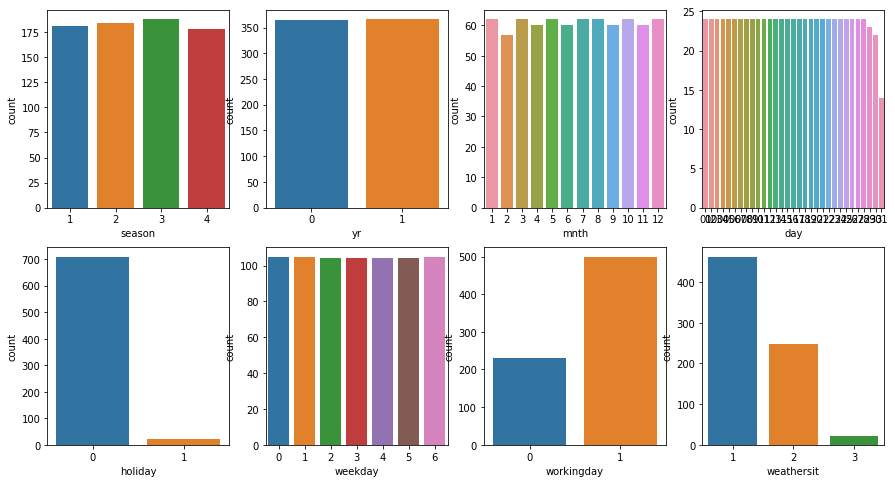

In [12]:
#bar plots
f, ax = plt.subplots(2,4, figsize = (15,8))
sns.countplot(x = 'season', data = df_init, ax = ax[0][0])
sns.countplot(x = 'yr', data = df_init, ax = ax[0][1])
sns.countplot(x = 'mnth', data = df_init, ax = ax[0][2])
sns.countplot(x = 'day', data = df_init, ax = ax[0][3])
sns.countplot(x = 'holiday', data = df_init, ax = ax[1][0])
sns.countplot(x = 'weekday', data = df_init, ax = ax[1][1])
sns.countplot(x = 'workingday', data = df_init, ax = ax[1][2])
sns.countplot(x = 'weathersit', data = df_init, ax = ax[1][3])

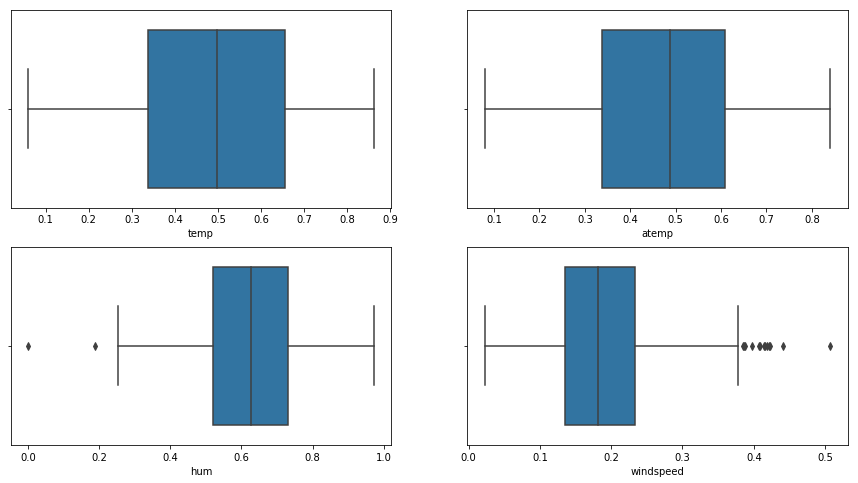

In [13]:
#Outlier Analysis#Box Plot
f, ax = plt.subplots(2,2, figsize = (15,8))
sns.boxplot(x = df_init['temp'], ax = ax[0][0])
sns.boxplot(x = df_init['atemp'], ax = ax[0][1])
sns.boxplot(x = df_init['hum'], ax = ax[1][0])
sns.boxplot(x = df_init['windspeed'], ax = ax[1][1])

In [14]:
df_init.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [48]:
##outlier treatment using KNN 
out_names = ['hum','windspeed']
for i in out_names:
    q75, q25 = np.percentile(df_init[i],[75,25])
    print(q75)
    print(q25)
    iqr = q75 - q25
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    df_init.loc[df_init[i] < minimum, i] = np.nan
    df_init.loc[df_init[i] > maximum, i] = np.nan


0.7302085
0.52
0.2332145
0.13495


In [16]:
df_init.isnull().sum()

season         0
yr             0
mnth           0
holiday        0
weekday        0
workingday     0
weathersit     0
temp           0
atemp          0
hum            2
windspeed     13
casual         0
registered     0
cnt            0
day            0
dtype: int64

In [49]:
#taking a backup as the KNN process below will convert every column to float.
df_init_v1 = df_init.copy()

In [50]:
#KNN imputation on the outliers
df_init_v1 = pd.DataFrame(KNN(k=3).fit_transform(df_init_v1), columns = df_init_v1.columns)

Imputing row 1/731 with 0 missing, elapsed time: 0.327
Imputing row 101/731 with 0 missing, elapsed time: 0.329
Imputing row 201/731 with 0 missing, elapsed time: 0.330
Imputing row 301/731 with 0 missing, elapsed time: 0.331
Imputing row 401/731 with 0 missing, elapsed time: 0.332
Imputing row 501/731 with 0 missing, elapsed time: 0.336
Imputing row 601/731 with 0 missing, elapsed time: 0.337
Imputing row 701/731 with 0 missing, elapsed time: 0.338


In [51]:
df_init['hum'] = df_init_v1['hum']
df_init['windspeed'] = df_init_v1['windspeed']

In [20]:
df_init.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day           0
dtype: int64

In [21]:
df_init.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.629488,0.186816,848.176471,3656.172367,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140031,0.071413,686.622488,1560.256377,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.254167,0.022392,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,315.500000,2497.000000,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627500,0.179721,713.000000,3662.000000,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730833,0.230723,1096.000000,4776.500000,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.378108,3410.000000,6946.000000,8714.000000


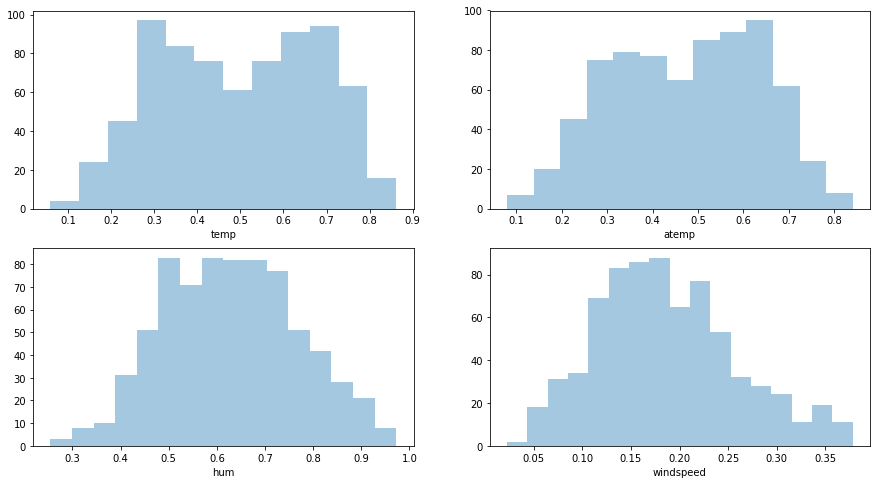

In [22]:
#visualisation for continuous variables
f, ax = plt.subplots(2,2, figsize = (15,8))
sns.distplot(df_init['temp'], kde = False, ax = ax[0][0])
sns.distplot(df_init['atemp'], kde = False, ax = ax[0][1])
sns.distplot(df_init['hum'], kde = False, ax = ax[1][0])
sns.distplot(df_init['windspeed'], kde = False, ax = ax[1][1])

In [52]:
#correlation analysis
cont_cnames = ["temp","atemp","hum","windspeed","casual","registered","cnt"]
df_init_corr_df = df_init.loc[:,cont_cnames]
df_init_corr = df_init_corr_df.corr()

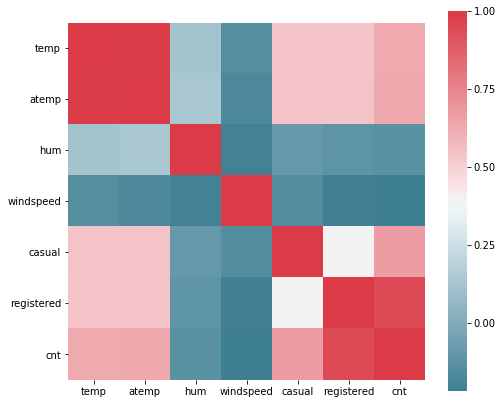

In [53]:
#correlation matrix
f, ax = plt.subplots(figsize = (8,7))
sns.heatmap(df_init_corr,
            mask = np.zeros_like(df_init_corr,dtype = np.bool),
            cmap = sns.diverging_palette(220,10,as_cmap=True),
            square = True, ax = ax)

In [54]:
#dropping atemp, casual and registered due to correlation and data leakage
df_init = df_init.drop(["atemp","casual","registered"], axis = 1)

In [26]:
df_init.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985,01
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801,02
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349,03
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562,04
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600,05


In [55]:
#dummy encoding
season_dummies = pd.get_dummies(df_init['season'], prefix = 'season')
mnth_dummies = pd.get_dummies(df_init['mnth'], prefix = 'mnth')
weekday_dummies = pd.get_dummies(df_init['weekday'], prefix = 'weekday')
day_dummies = pd.get_dummies(df_init['day'], prefix = 'day')
weathersit_dummies = pd.get_dummies(df_init['weathersit'], prefix = 'weathersit')

In [56]:
df_init = pd.concat([df_init,season_dummies],join='inner',axis=1)
df_init = pd.concat([df_init,mnth_dummies],join='inner',axis=1)
df_init = pd.concat([df_init,weekday_dummies],join='inner',axis=1)
df_init = pd.concat([df_init,day_dummies],join='inner',axis=1)
df_init = pd.concat([df_init,weathersit_dummies],join='inner',axis=1)

In [57]:
df_init = df_init.drop(["season","mnth","weekday","day","weathersit"], axis = 1)

In [30]:
df_init.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_1,season_2,season_3,...,day_25,day_26,day_27,day_28,day_29,day_30,day_31,weathersit_1,weathersit_2,weathersit_3
0,0,0,0,0.344167,0.805833,0.160446,985,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0.363478,0.696087,0.248539,801,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0.196364,0.437273,0.248309,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0.200000,0.590435,0.160296,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0.226957,0.436957,0.186900,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
#sampling
train, test = train_test_split(df_init, test_size = 0.2)

In [59]:
y_train = train["cnt"]
y_test = test["cnt"]
x_train = train.drop(["cnt"], axis = 1)
x_test = test.drop(["cnt"], axis = 1)

In [60]:
#defining error metric MAPE
def MAPE(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred)/y_true))*100
    return mape

In [61]:
#Decision Tree Regression
DT_reg = DecisionTreeRegressor(max_depth = 2).fit(x_train,y_train)

In [62]:
DT_pred = DT_reg.predict(x_test)

In [63]:
#error metric of Decision Tree
MAPE(y_test, DT_pred)

28.291370975198333

In [64]:
#Random Forest Regression
RF_reg = RandomForestRegressor(max_depth = 2, n_estimators = 300).fit(x_train,y_train)

In [65]:
RF_pred = RF_reg.predict(x_test)

In [66]:
#error metric of Random Forest
MAPE(y_test, RF_pred)

27.524964686225168

In [67]:
#Linear Regression
Lin_reg = sm.OLS(y_train, x_train).fit()

In [68]:
Lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     52.21
Date:                Wed, 10 Apr 2019   Prob (F-statistic):          8.95e-181
Time:                        09:39:18   Log-Likelihood:                -4695.1
No. Observations:                 584   AIC:                             9506.
Df Residuals:                     526   BIC:                             9760.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
yr            2006.9454     67.643     29.670      0.000    1874.062    2139.829
holiday         38.4178    171.069      0.225      0.822    -297.644     374.480
workingday     626.3481     93.925      6.669      0.000     441.835     810.861
temp          4424.5716    477.329      9.269      0.000    3486.867    5362.277
hum          -1332.7921    366.102     -3.640      0.000   -2051.994    -613.590
windspeed    -2671.5196    519.256     -5.145      0.000   -3691.590   -1651.449
season_1      -321.9599    158.850     -2.027      0.043    -634.018      -9.902
season_2       527.1468    155.627      3.387      0.001     221.420     832.874
season_3       523.3489    165.684      3.159      0.002     197.865     848.833
season_4      1130.5060    168.480      6.710      0.000     799.530    1461.482
mnth_1        -260.0629    198.113     -1.313      0.190    -649.254     129.128
mnth_2        -146.3505    188.057     -0.778      0.437    -515.785     223.084
mnth_3         294.8935    145.021      2.033      0.043      10.003     579.784
mnth_4         268.5930    175.864      1.527      0.127     -76.889     614.075
mnth_5         546.2080    193.506      2.823      0.005     166.069     926.347
mnth_6         342.2004    178.145      1.921      0.055      -7.762     692.163
mnth_7        -182.8050    211.429     -0.865      0.388    -598.155     232.545
mnth_8         247.5966    196.439      1.260      0.208    -138.306     633.499
mnth_9         821.5667    159.781      5.142      0.000     507.680    1135.454
mnth_10        420.3267    181.642      2.314      0.021      63.493     777.160
mnth_11       -285.7287    188.296     -1.517      0.130    -655.632      84.175
mnth_12       -207.3959    162.143     -1.279      0.201    -525.924     111.132
weekday_0      411.4248    129.622      3.174      0.002     156.784     666.066
weekday_1      -20.2126     85.915     -0.235      0.814    -188.990     148.565
weekday_2      111.1184     88.159      1.260      0.208     -62.069     284.306
weekday_3      176.9421     88.513      1.999      0.046       3.059     350.825
weekday_4      196.6138     88.502      2.222      0.027      22.752     370.475
weekday_5      200.3042     86.130      2.326      0.020      31.104     369.505
weekday_6      782.8511    126.306      6.198      0.000     534.726    1030.976
day_01        -133.6787    190.338     -0.702      0.483    -507.595     240.238
day_02          21.6988    196.232      0.111      0.912    -363.795     407.193
day_03         148.8085    179.938      0.827      0.409    -204.677     502.294
day_04         285.8103    167.851      1.703      0.089     -43.930     615.551
day_05          49.4320    184.520      0.268      0.789    -313.055     411.919
day_06         169.0325    180.088      0.939      0.348    -184.748     522.813
day_0

In [69]:
LR_pred = Lin_reg.predict(x_test)

In [70]:
#error metric of Linear Regression
MAPE(y_test, LR_pred)

17.436140389504793

In [85]:
#KNN
KNN_reg = KNeighborsRegressor(n_neighbors = 2).fit(x_train, y_train)

In [86]:
KNN_pred = KNN_reg.predict(x_test)

In [87]:
MAPE(y_test, KNN_pred)

28.857193995074315